In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/students-performance-in-exams/StudentsPerformance.csv


### Credits : https://www.kaggle.com/roshansharma/student-performance-analysis

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('/kaggle/input/students-performance-in-exams/StudentsPerformance.csv')
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
data.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


In [9]:
data.select_dtypes(include= np.object).nunique()

gender                         2
race/ethnicity                 5
parental level of education    6
lunch                          2
test preparation course        2
dtype: int64

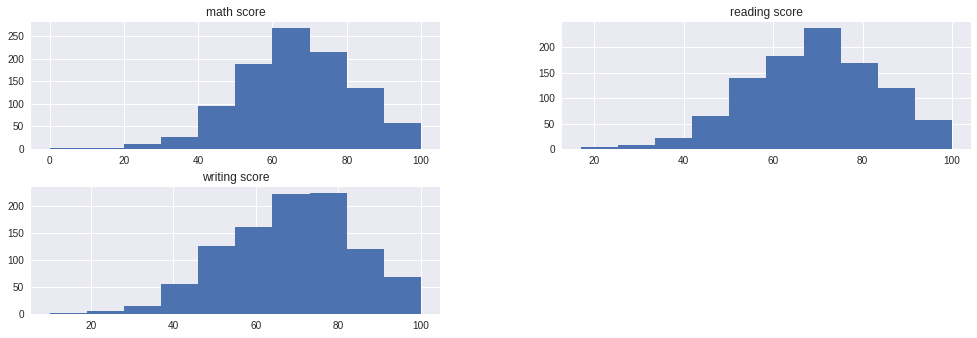

In [36]:
plt.style.use('seaborn')
data.select_dtypes(include= np.int64).hist(figsize = (15,5))
plt.show()

data distribution relates to gender : female
data distribution relates to gender : male


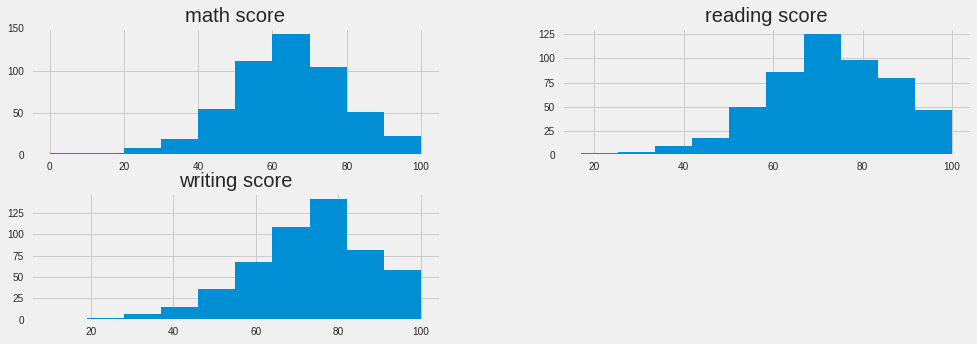

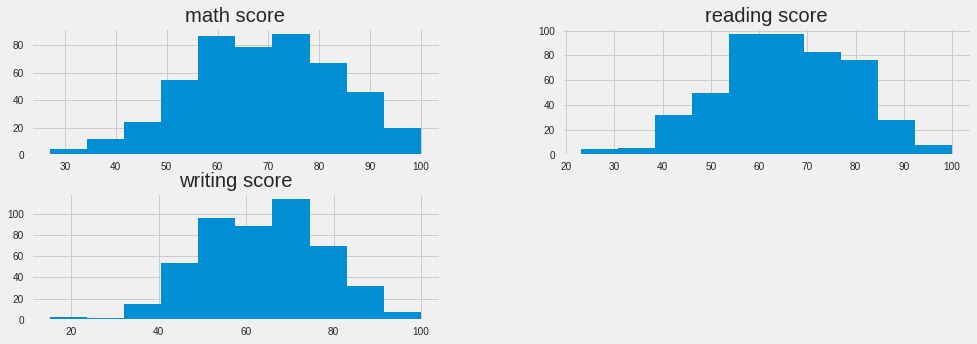

In [37]:
plt.style.use('fivethirtyeight')

for i in data[list(data.select_dtypes(include= np.object).columns)[0]].unique():
    data[data['gender'] == i].select_dtypes(include = np.int64).hist(figsize = (15,5))
    print('data distribution relates to gender : {}'.format(i))
plt.show()

data distribution relates to groups : group B
data distribution relates to groups : group C
data distribution relates to groups : group A
data distribution relates to groups : group D
data distribution relates to groups : group E


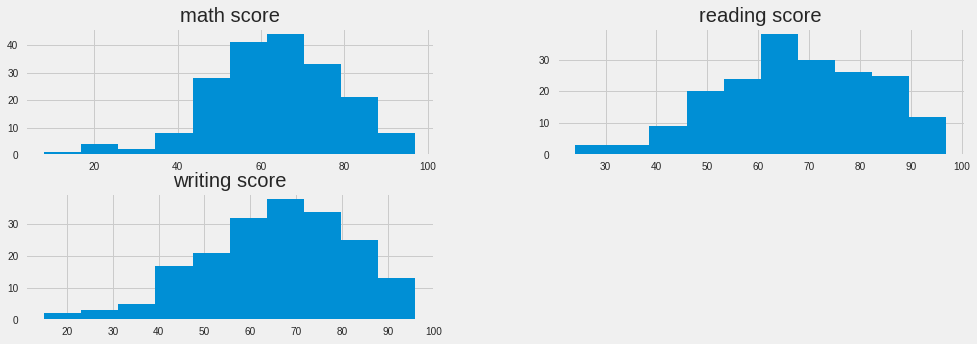

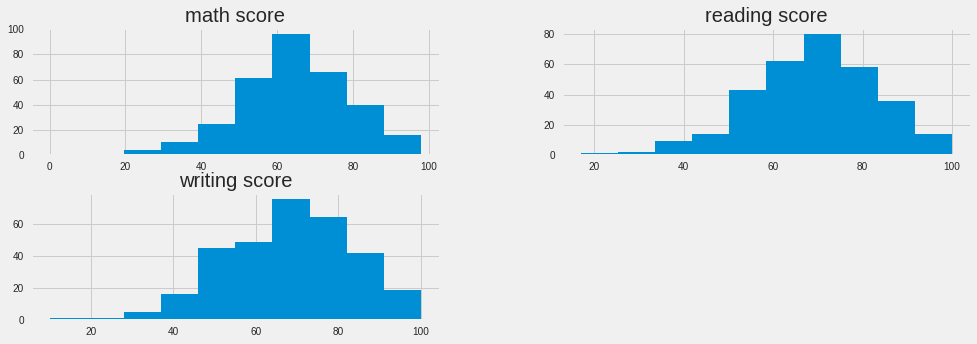

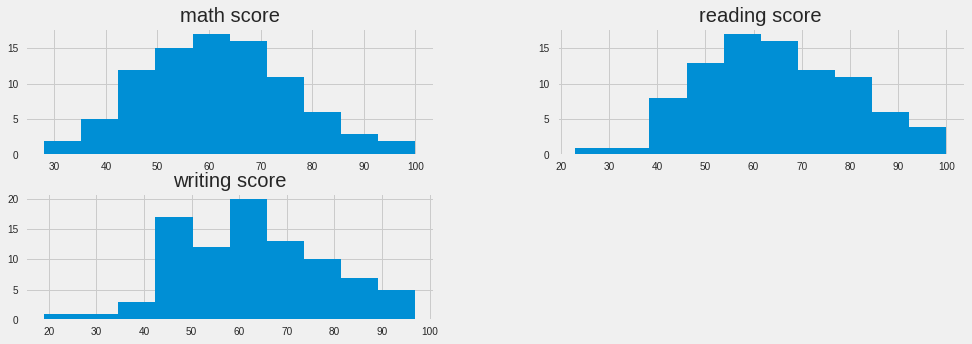

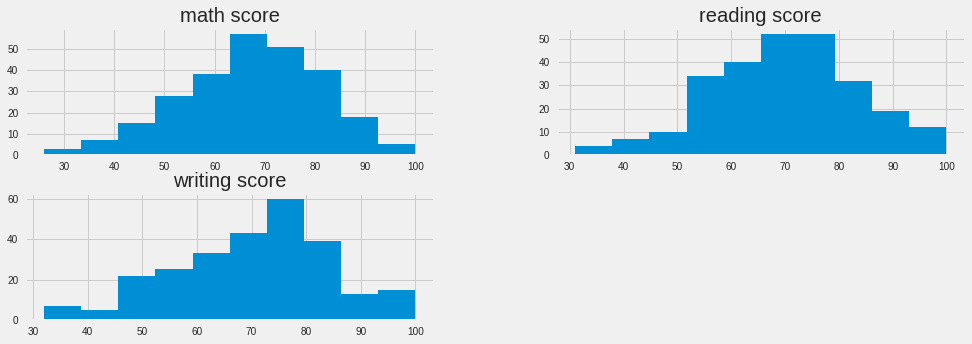

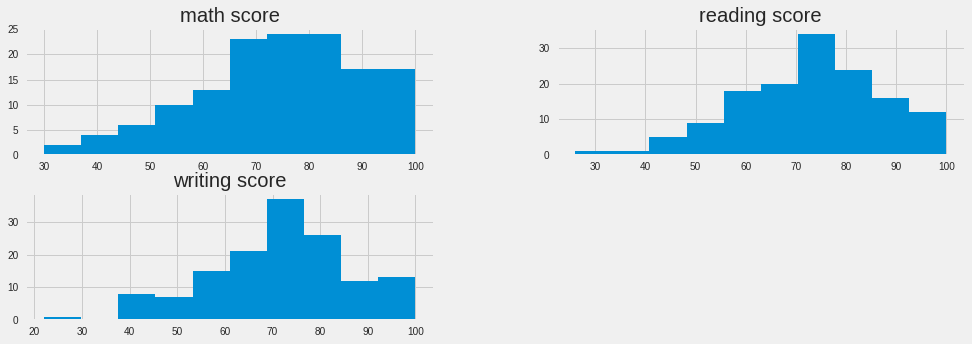

In [38]:
for i in data[list(data.select_dtypes(include= np.object).columns)[1]].unique():
    data[data['race/ethnicity'] == i].select_dtypes(include = np.int64).hist(figsize = (15,5))
    print('data distribution relates to groups : {}'.format(i))
plt.show()

data distribution relates to parental level of education : bachelor's degree
data distribution relates to parental level of education : some college
data distribution relates to parental level of education : master's degree
data distribution relates to parental level of education : associate's degree
data distribution relates to parental level of education : high school
data distribution relates to parental level of education : some high school


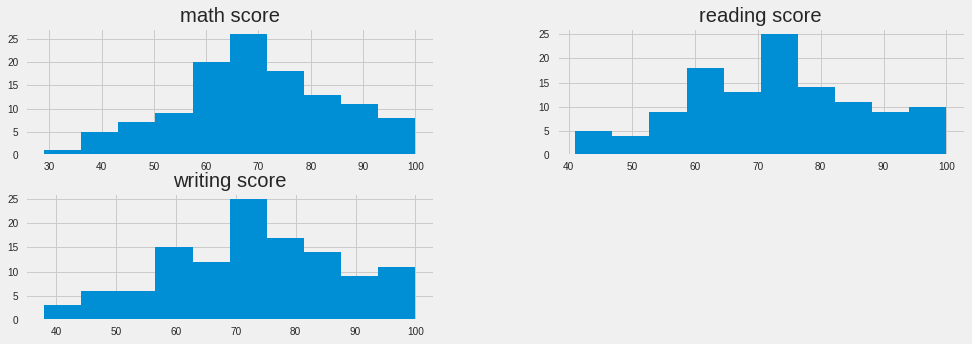

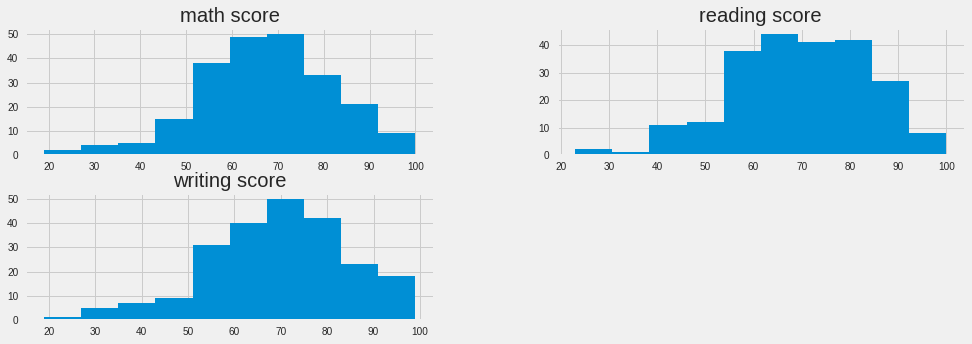

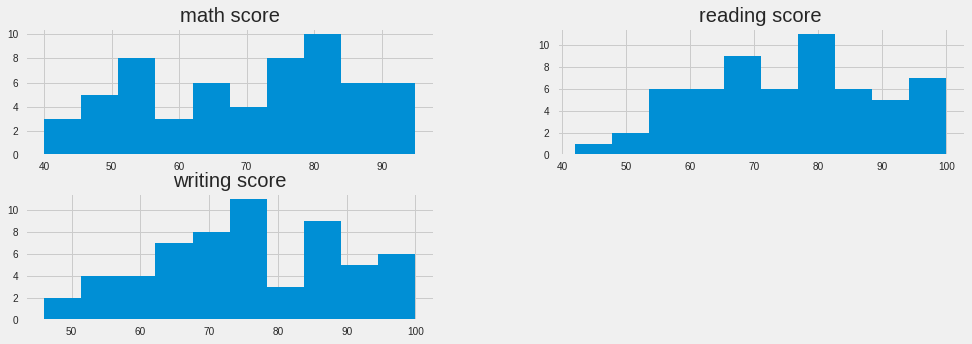

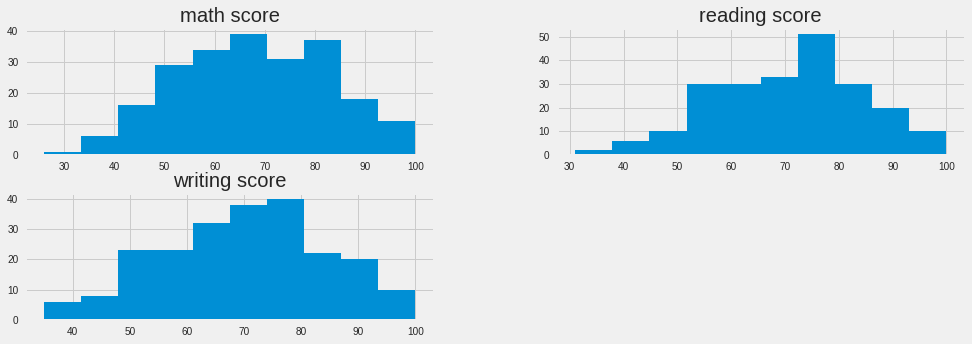

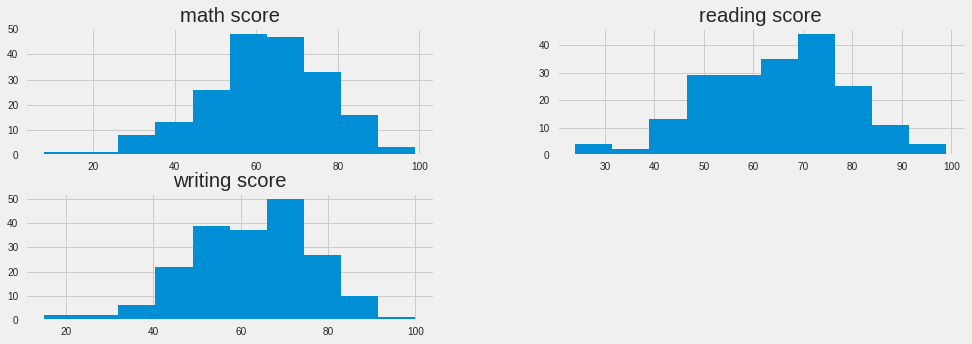

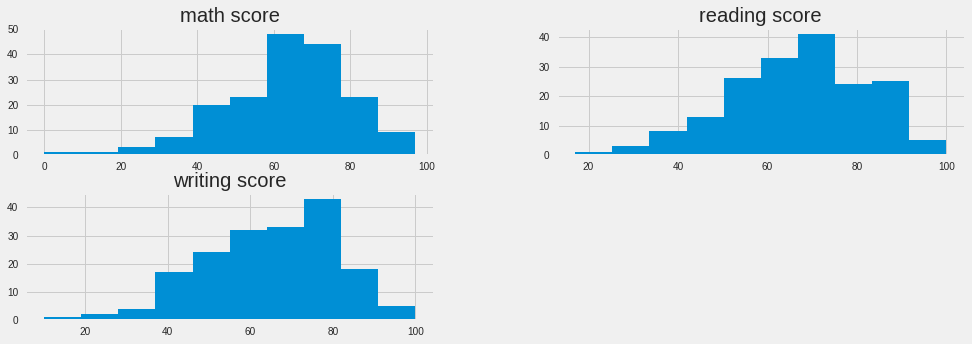

In [39]:
for i in data[list(data.select_dtypes(include= np.object).columns)[2]].unique():
    data[data['parental level of education'] == i].select_dtypes(include = np.int64).hist(figsize = (15,5))
    print('data distribution relates to parental level of education : {}'.format(i))
plt.show()

data distribution relates to test preparation course : none
data distribution relates to test preparation course : completed


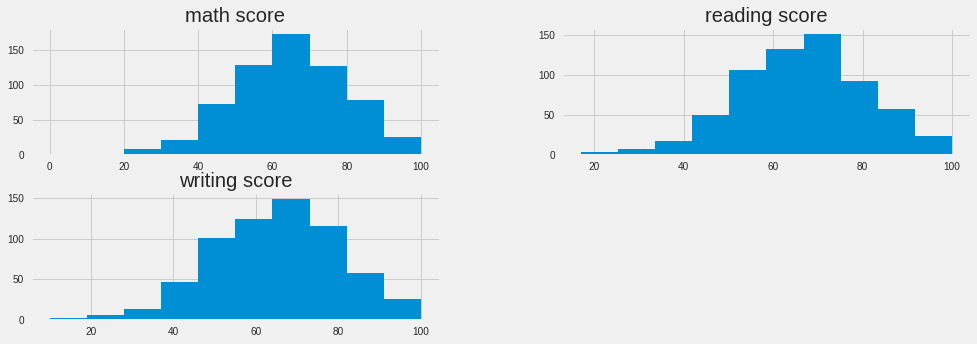

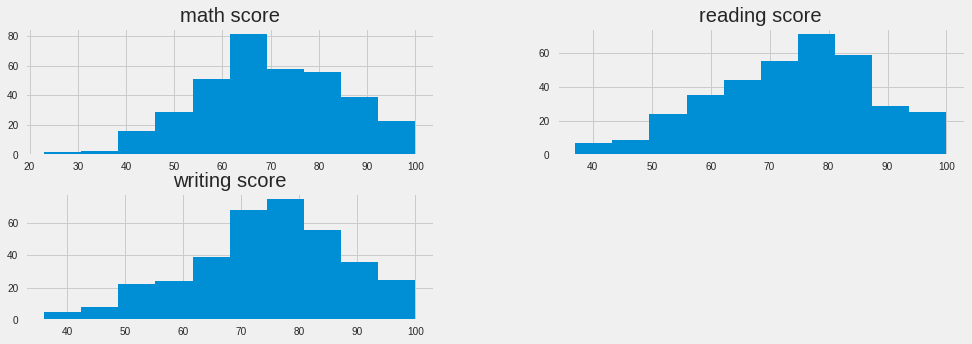

In [40]:
for i in data[list(data.select_dtypes(include= np.object).columns)[-1]].unique():
    data[data['test preparation course'] == i].select_dtypes(include = np.int64).hist(figsize = (15,5))
    print('data distribution relates to test preparation course : {}'.format(i))
plt.show()

In [44]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

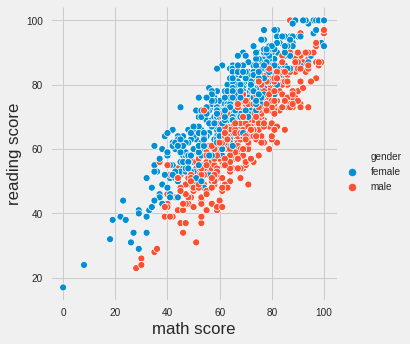

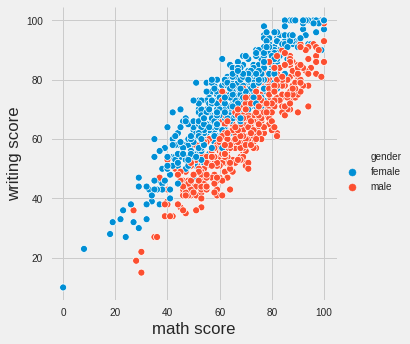

In [46]:
for i in ['reading score','writing score']:
    sns.relplot(x = 'math score', y = i, data = data, hue = 'gender')
plt.show()

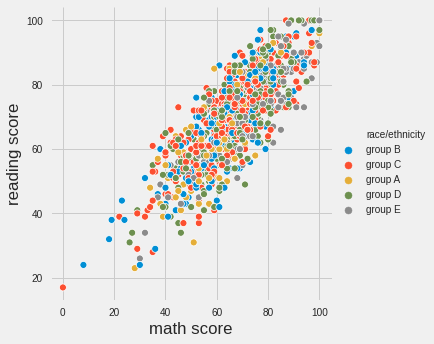

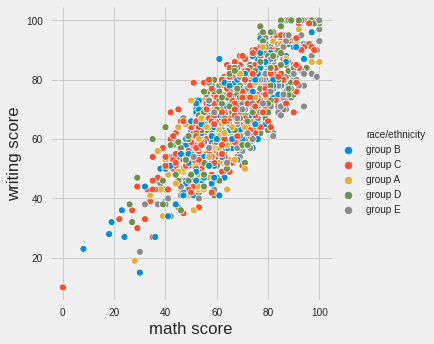

In [47]:
for i in ['reading score','writing score']:
    sns.relplot(x = 'math score', y = i, data = data, hue = 'race/ethnicity')
plt.show()

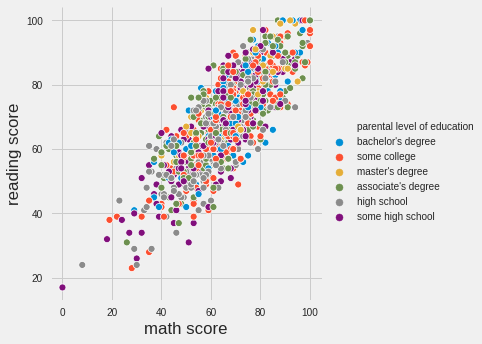

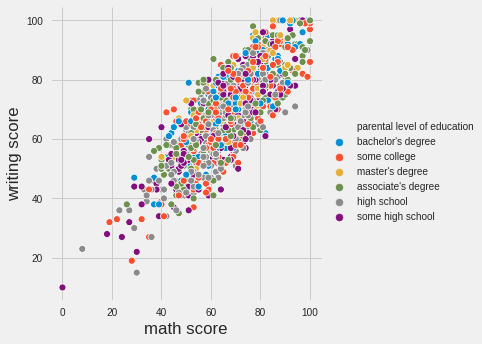

In [48]:
for i in ['reading score','writing score']:
    sns.relplot(x = 'math score', y = i, data = data, hue = 'parental level of education')
plt.show()

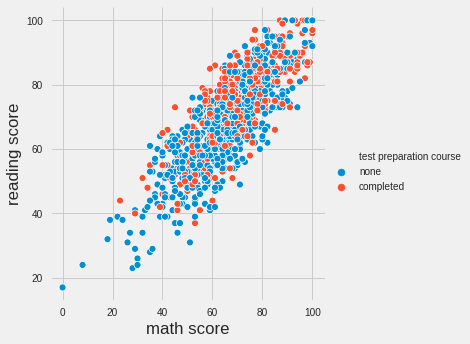

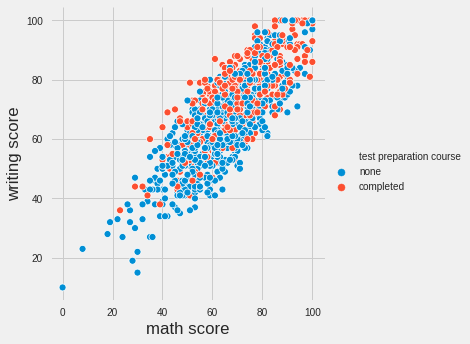

In [49]:
for i in ['reading score','writing score']:
    sns.relplot(x = 'math score', y = i, data = data, hue = 'test preparation course')
plt.show()

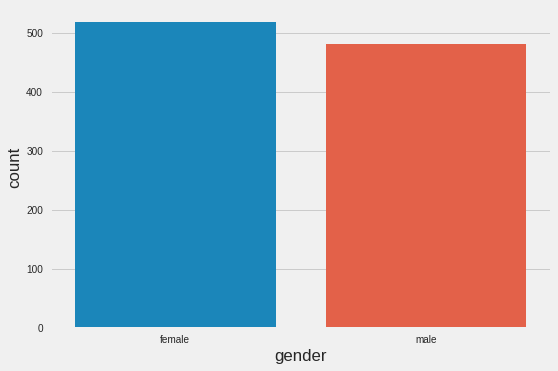

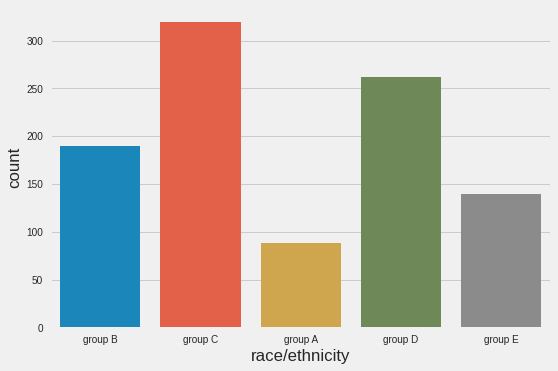

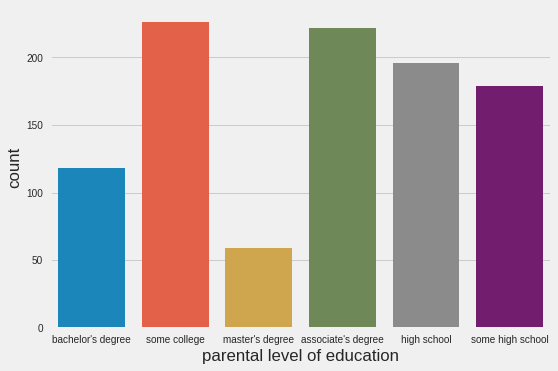

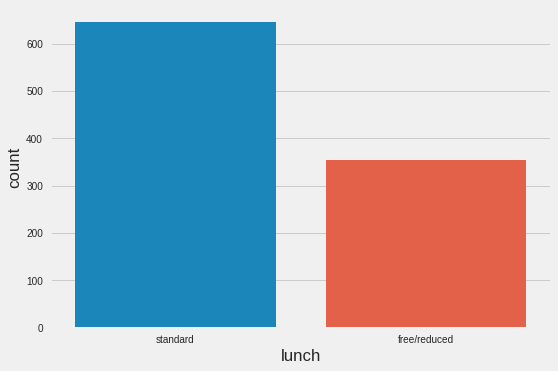

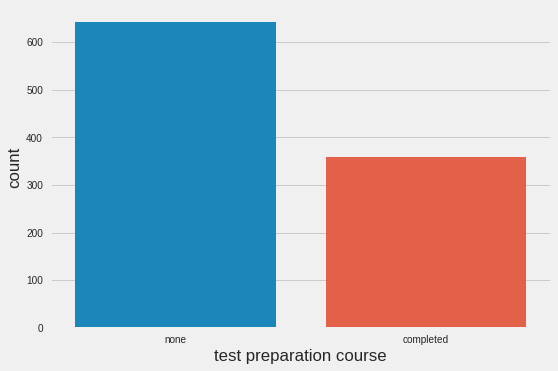

In [50]:
for i in data.select_dtypes(include= np.object).columns:
    sns.countplot(x = i, data = data )
    plt.show()

In [67]:
# inferential stats
# probability of students getting more than 50 % marks
def get_students_math_marks_morethan50(data):
    total_students = data.shape[0]
    students_getting_marks_morethan50 = (data[data['math score'] > 50].shape[0] / total_students)* 100
    return print('students getting more than 50% marks in math : {}'.format(students_getting_marks_morethan50))

def get_students_reading_score_morethan50(data):
    total_students = data.shape[0]
    students_getting_marks_morethan50_read = (data[data['reading score'] > 50].shape[0] / total_students)* 100
    return print('students getting more than 50% marks in reading : {}'.format(students_getting_marks_morethan50_read))

def get_students_writing_score_morethan50(data):
    total_students = data.shape[0]
    students_getting_marks_morethan50_write = (data[data['writing score'] > 50].shape[0] / total_students)* 100
    return print('students getting more than 50% marks in writing : {}'.format(students_getting_marks_morethan50_write))

#####--------------------------


def get_students_math_marks_lessthan50(data):
    total_students = data.shape[0]
    students_getting_marks_lessthan50 = (data[data['math score'] < 50].shape[0] / total_students)* 100
    return print('students getting less than 50% marks in math : {}'.format(students_getting_marks_lessthan50))

def get_students_reading_score_lessthan50(data):
    total_students = data.shape[0]
    students_getting_marks_lessthan50_read = (data[data['reading score'] < 50].shape[0] / total_students)* 100
    return print('students getting less than 50% marks in reading : {}'.format(students_getting_marks_lessthan50_read))

def get_students_writing_score_lessthan50(data):
    total_students = data.shape[0]
    students_getting_marks_lessthan50_write = (data[data['writing score'] < 50].shape[0] / total_students)* 100
    return print('students getting less than 50% marks in writing : {}'.format(students_getting_marks_lessthan50_write))
######----------------------------

def get_students_math_marks_morethan90(data):
    total_students = data.shape[0]
    students_getting_marks_morethan90 = (data[data['math score'] > 90].shape[0] / total_students)* 100
    return print('students getting more than 90% marks in math : {}'.format(students_getting_marks_morethan90))

def get_students_reading_score_morethan90(data):
    total_students = data.shape[0]
    students_getting_marks_morethan90_read = (data[data['reading score'] > 90].shape[0] / total_students)* 100
    return print('students getting more than 90% marks in reading : {}'.format(students_getting_marks_morethan90_read))

def get_students_writing_score_morethan90(data):
    total_students = data.shape[0]
    students_getting_marks_morethan90_write = (data[data['writing score'] > 90].shape[0] / total_students)* 100
    return print('students getting more than 90% marks in writing : {}'.format(students_getting_marks_morethan90_write))

In [68]:
get_students_math_marks_morethan50(data)

students getting more than 50% marks in math : 85.0


In [69]:
get_students_reading_score_morethan50(data)

students getting more than 50% marks in reading : 90.3


In [70]:
get_students_writing_score_morethan50(data)

students getting more than 50% marks in writing : 87.6


In [71]:
get_students_math_marks_lessthan50(data)

students getting less than 50% marks in math : 13.5


In [72]:
get_students_reading_score_lessthan50(data)

students getting less than 50% marks in reading : 9.0


In [73]:
get_students_writing_score_lessthan50(data)

students getting less than 50% marks in writing : 11.4


In [74]:
get_students_math_marks_morethan90(data)

students getting more than 90% marks in math : 5.0


In [75]:
get_students_reading_score_morethan90(data)

students getting more than 90% marks in reading : 6.2


In [76]:
get_students_writing_score_morethan90(data)

students getting more than 90% marks in writing : 6.800000000000001


In [77]:
total_students = data.shape[0]
number_of_students_passing_in_all_subjects = data[(data['math score'] > 40) &
                                                  (data['writing score'] > 40) & 
                                                  (data['reading score'] > 40)].shape[0]
probability_of_students_passing_in_all_the_subjects = (number_of_students_passing_in_all_subjects/total_students)*100
print("The Probability of Students Passing in all the Subjects is {0:.2f} %".format(probability_of_students_passing_in_all_the_subjects))

total_students = data.shape[0]
number_of_students_scoring_more_than_90 = data[(data['math score'] > 90) &
                                                  (data['writing score'] > 90) & 
                                                  (data['reading score'] > 90)].shape[0]

probability_of_students_scoring_more_than_90_in_all_subjects = (number_of_students_scoring_more_than_90/total_students)*100
print("The Probability of Students Passing in all the Subjects is {0:.2f} %".
      format(probability_of_students_scoring_more_than_90_in_all_subjects))

The Probability of Students Passing in all the Subjects is 93.90 %
The Probability of Students Passing in all the Subjects is 2.30 %


In [78]:
# confidence interval for math

import scipy.stats as stats
import math

# lets seed the random values
np.random.seed(10)

# lets take a sample size
sample_size = 1000
sample = np.random.choice(a= data['math score'],
                          size = sample_size)
sample_mean = sample.mean()

# Get the z-critical value*
z_critical = stats.norm.ppf(q = 0.95)  

 # Check the z-critical value  
print("z-critical value: ",z_critical)                                

# Get the population standard deviation
pop_stdev = data['math score'].std()  

# checking the margin of error
margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size)) 

# defining our confidence interval
confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

# lets print the results
print("Confidence interval:",end=" ")
print(confidence_interval)
print("True mean: {}".format(data['math score'].mean()))

z-critical value:  1.6448536269514722
Confidence interval: (64.82729483328328, 66.40470516671672)
True mean: 66.089


In [79]:
# confidence interval for reading

# lets seed the random values
np.random.seed(10)

# lets take a sample size
sample_size = 1000
sample = np.random.choice(a= data['reading score'],
                          size = sample_size)
sample_mean = sample.mean()

# Get the z-critical value*
z_critical = stats.norm.ppf(q = 0.95)  

 # Check the z-critical value  
print("z-critical value: ",z_critical)                                

# Get the population standard deviation
pop_stdev = data['reading score'].std()  

# checking the margin of error
margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size)) 

# defining our confidence interval
confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

# lets print the results
print("Confidence interval:",end=" ")
print(confidence_interval)
print("True mean: {}".format(data['reading score'].mean()))

z-critical value:  1.6448536269514722
Confidence interval: (67.75757337011645, 69.27642662988355)
True mean: 69.169


In [80]:
## confidence interval for writing score

np.random.seed(10)

# lets take a sample size
sample_size = 1000
sample = np.random.choice(a= data['writing score'],
                          size = sample_size)
sample_mean = sample.mean()

# Get the z-critical value*
z_critical = stats.norm.ppf(q = 0.95)  

 # Check the z-critical value  
print("z-critical value: ",z_critical)                                

# Get the population standard deviation
pop_stdev = data['writing score'].std()  

# checking the margin of error
margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size)) 

# defining our confidence interval
confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

# lets print the results
print("Confidence interval:",end=" ")
print(confidence_interval)
print("True mean: {}".format(data['writing score'].mean()))

z-critical value:  1.6448536269514722
Confidence interval: (66.80960035030861, 68.39039964969137)
True mean: 68.054


- Notice that the true mean is contained in our interval.
- A confidence interval of 95% would mean that if we take many samples and create confidence intervals for each of them, 95% of our samples' confidence intervals will contain the true population mean.
- Now, let's create several confidence intervals and plot them to get a better sense of what it means to "capture" the true mean

In [86]:
for i in ['math score','reading score', 'writing score']:
    print('results for :{}'.format(i))
    print(data.groupby('gender')[i].agg(['min', 'mean','max']), '\n')

results for :math score
        min       mean  max
gender                     
female    0  63.633205  100
male     27  68.728216  100 

results for :reading score
        min       mean  max
gender                     
female   17  72.608108  100
male     23  65.473029  100 

results for :writing score
        min       mean  max
gender                     
female   10  72.467181  100
male     15  63.311203  100 



In [88]:
for i in ['math score','reading score', 'writing score']:
    print('results for :{}'.format(i))
    print(data.groupby(['race/ethnicity','gender'])[i].agg(['min', 'mean','max']), '\n')

results for :math score
                       min       mean  max
race/ethnicity gender                     
group A        female   34  58.527778   92
               male     28  63.735849  100
group B        female    8  61.403846   97
               male     30  65.930233   94
group C        female    0  62.033333   96
               male     27  67.611511   98
group D        female   26  65.248062   98
               male     39  69.413534  100
group E        female   32  70.811594  100
               male     30  76.746479  100 

results for :reading score
                       min       mean  max
race/ethnicity gender                     
group A        female   43  69.000000  100
               male     23  61.735849   96
group B        female   24  71.076923   97
               male     24  62.848837   96
group C        female   17  71.944444  100
               male     28  65.424460  100
group D        female   31  74.046512  100
               male     34  66.135338   97
g

In [89]:
for i in ['math score','reading score', 'writing score']:
    print('results for :{}'.format(i))
    print(data.groupby(['parental level of education','gender'])[i].agg(['min', 'mean','max']), '\n')

results for :math score
                                    min       mean  max
parental level of education gender                     
associate's degree          female   26  65.250000  100
                            male     40  70.764151  100
bachelor's degree           female   29  68.349206  100
                            male     37  70.581818  100
high school                 female    8  59.351064   99
                            male     27  64.705882   94
master's degree             female   40  66.500000   94
                            male     46  74.826087   95
some college                female   19  65.406780  100
                            male     28  69.009259  100
some high school            female    0  59.296703   97
                            male     30  67.840909   94 

results for :reading score
                                    min       mean  max
parental level of education gender                     
associate's degree          female   31  74.120690 

In [90]:
for i in ['math score','reading score', 'writing score']:
    print('results for :{}'.format(i))
    print(data.groupby(['lunch','gender'])[i].agg(['min', 'mean','max']), '\n')

results for :math score
                     min       mean  max
lunch        gender                     
free/reduced female    0  55.814815   93
             male     27  62.457831  100
standard     female   19  68.124620  100
             male     30  72.022152  100 

results for :reading score
                     min       mean  max
lunch        gender                     
free/reduced female   17  67.386243  100
             male     23  61.542169  100
standard     female   29  75.607903  100
             male     26  67.537975  100 

results for :writing score
                     min       mean  max
lunch        gender                     
free/reduced female   10  66.444444  100
             male     15  59.126506   93
standard     female   30  75.927052  100
             male     22  65.509494  100 



In [91]:
for i in ['math score','reading score', 'writing score']:
    print('results for :{}'.format(i))
    print(data.groupby(['test preparation course','gender'])[i].agg(['min', 'mean','max']), '\n')

results for :math score
                                min       mean  max
test preparation course gender                     
completed               female   23  67.195652   99
                        male     39  72.339080  100
none                    female    0  61.670659  100
                        male     27  66.688312   97 

results for :reading score
                                min       mean  max
test preparation course gender                     
completed               female   40  77.375000  100
                        male     37  70.212644  100
none                    female   17  69.982036  100
                        male     23  62.795455   96 

results for :writing score
                                min       mean  max
test preparation course gender                     
completed               female   36  78.793478  100
                        male     38  69.793103  100
none                    female   10  68.982036  100
                        male     1

In [87]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

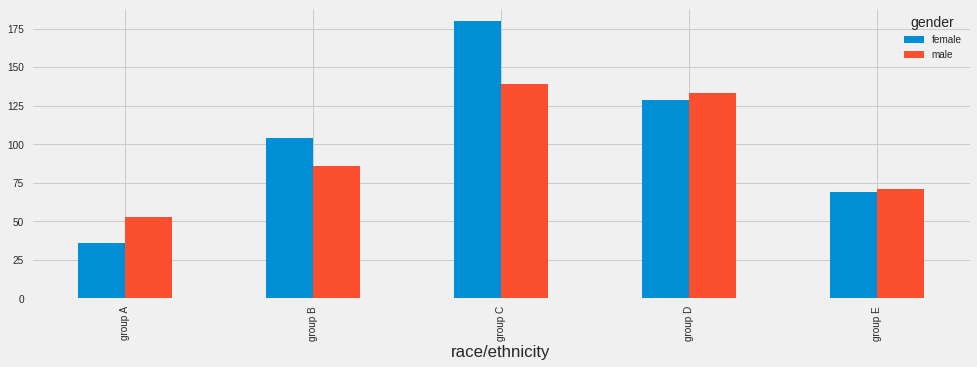

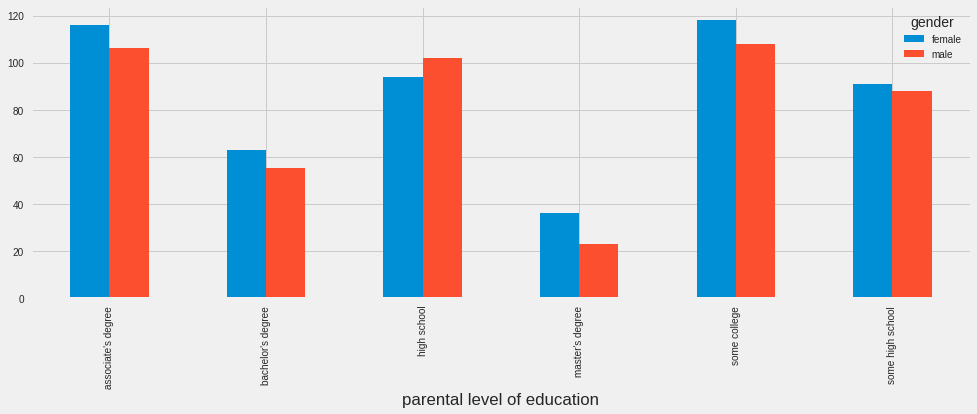

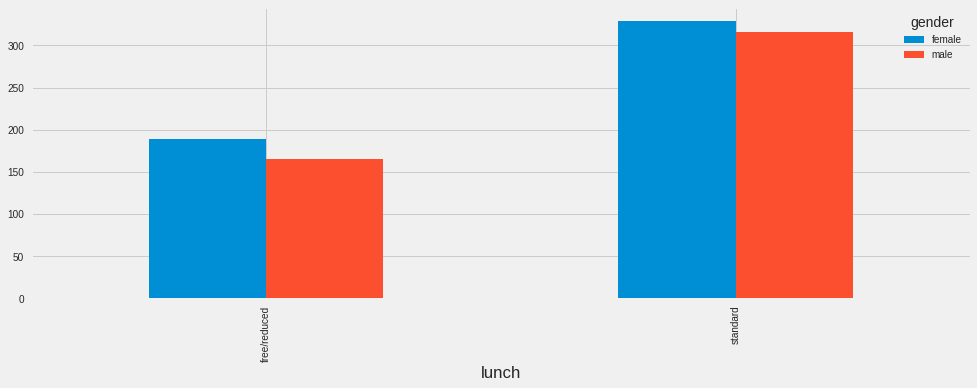

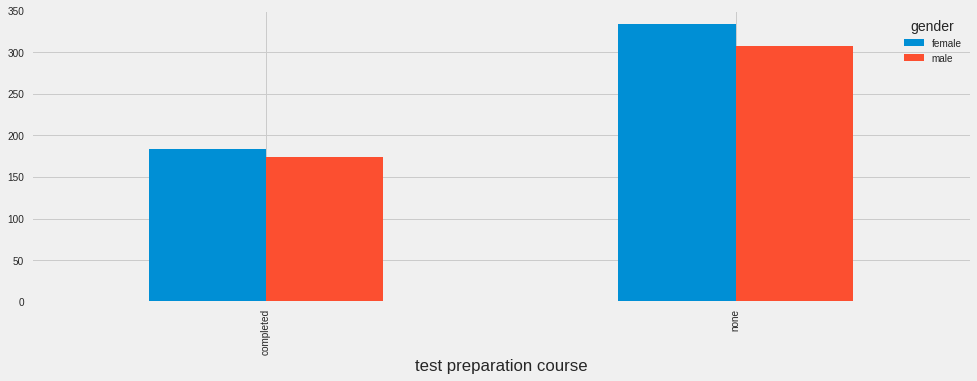

In [97]:
for i in ['race/ethnicity', 'parental level of education', 'lunch','test preparation course']:
    pd.crosstab( data[i], data['gender']).plot(kind = 'bar',figsize = (15,5))
plt.show()

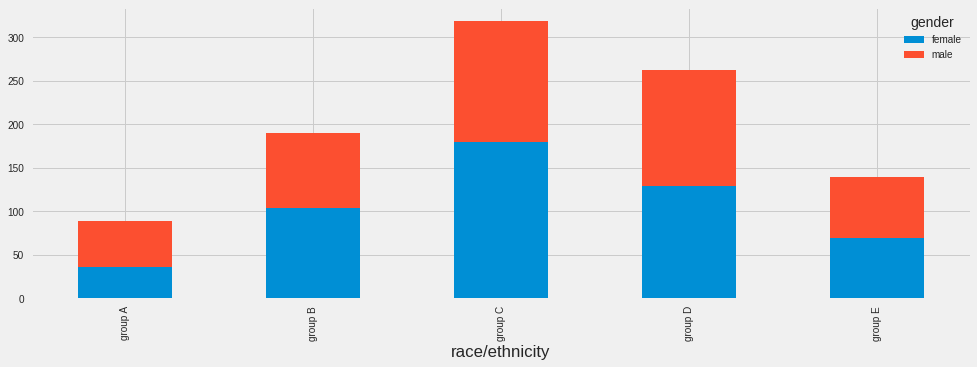

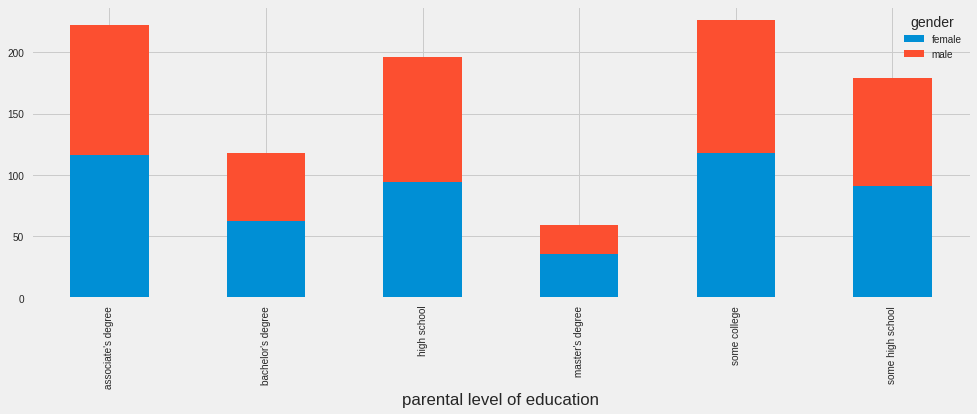

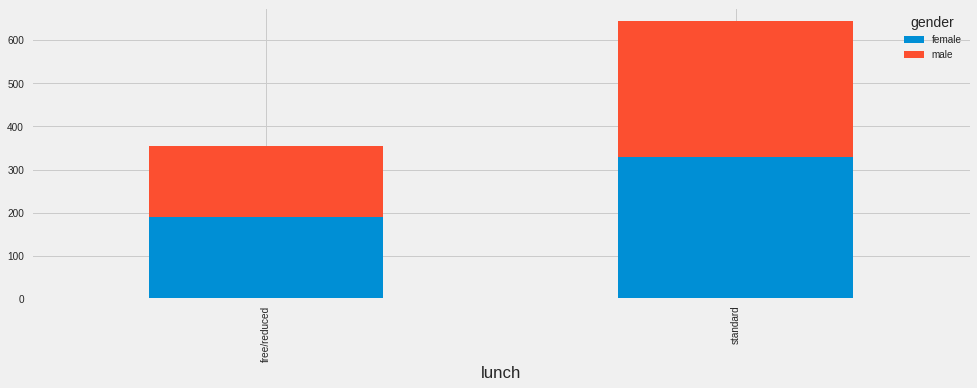

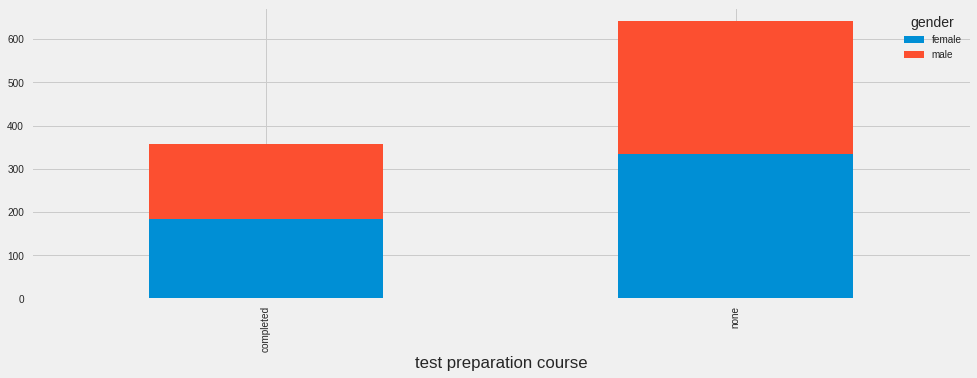

In [98]:
for i in ['race/ethnicity', 'parental level of education', 'lunch','test preparation course']:
    pd.crosstab( data[i], data['gender']).plot(kind = 'bar',figsize = (15,5), stacked = True)
plt.show()